<h1 style='text-align: center;'> Abdelrahman Mohamed Mostafa </h1>

# Project objective
The objective of this project is to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.


## Linear Regression Model Using Scikit Learn
In this project I will use scikit-learn library to build a simple linear regression model


1. [Prepare Data](#1.-Prepare-Data)     
    1.1 [Import](#1.1-Import)       
    1.2 [Explore](#1.2-Explore)               
    1.3 [Split](#1.3-Split)
2. [Build Model](#2.-Build-Model)    
    2.1 [Iterate](#2.1-Iterate)            
    2.2 [Evaluate](#2.2-Evaluate)
3. [Communicate Results](#3.-Communicate-Results)             
4. [Predicting student score if student studied 9.25 hours/day](#4.-Predicting-student-score-if-student-studied-9.25-hours/day)            
 

In [1]:
# Importing all libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

# 1. Prepare Data

## 1.1 Import

In [2]:
# Importing the CSV file into a dataframe
df = pd.read_csv("student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 1.2 Explore

### **Checking the data for appropriate data types, missing values and duplicated values**

In [3]:
# Checking the overall data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# Checking for duplicated rows
df.duplicated().sum()

0

### **Exploring the distibution of study hours feature variable for any outliers**

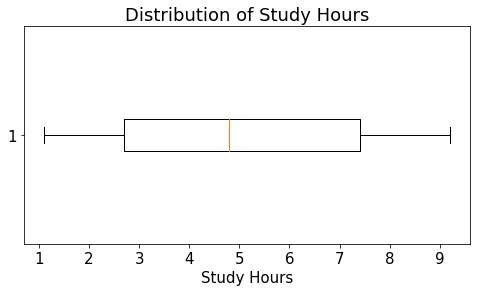

In [6]:
# Chart size
fig, ax = plt.subplots(figsize=(8, 4))

# Ploting a boxplot for the study hours variable
plt.boxplot(df["Hours"], vert=False)
plt.xlabel("Study Hours", fontsize=15)
plt.title("Distribution of Study Hours", fontsize=18)
ax.tick_params(axis='both', labelsize=15)
plt.show();

**There is no outliers founded in the feature variable**

### **Exploring the relation between the the target (Scores) & the Feature (Hours of study)**

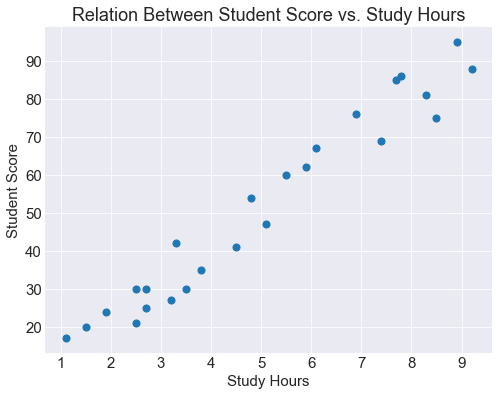

In [7]:
# Chart style and size
plt.style.use("seaborn-darkgrid")
fig, ax = plt.subplots(figsize=(8, 6))

# Ploting a scatter plot between the score as a function of study hours
plt.scatter(x=df["Hours"], y=df["Scores"], s=50)
plt.xlabel("Study Hours", fontsize=15)
plt.ylabel("Student Score", fontsize=15)
plt.title("Relation Between Student Score vs. Study Hours", fontsize=18)
ax.tick_params(axis='both', labelsize=15)
plt.show();

In [8]:
# Checking the pearson correlation coefficient between the two variable
df["Scores"].corr(df["Hours"])

0.9761906560220887

**There is a strong positive correlation between the study hours and the sudents score that we can predict the score based upon the hours of study** 

## 1.3 Split

In [9]:
# Splitting the data into feature matrix (X) and target vector (y)
feature = ["Hours"]
target = "Scores"
X = df[feature]
y = df[target]

In [10]:
# Splitting the data into training and testing data set where the test set is 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# 2. Build Model

## 2.1 Iterate

In [11]:
# Instantiate  LinearRegression model
model = LinearRegression()
# Fitting the trainning data set 
model.fit(X_train, y_train)

LinearRegression()

## 2.2 Evaluate

In [12]:
# Checking the mean absolute error for the prediction of the testing data set
round(metrics.mean_absolute_error(y_test, model.predict(X_test)), 2)

5.07

**The mean absolute error for our model is 5.07 which means that the average error between the actual values and the predicted values is 5.07 student score error** 

# 3. Communicate Results

### **The equation of the model for predicting the student score**

In [13]:
intercept = round(model.intercept_, 2)
coefficient = round(model.coef_[0], 2)
print(f"Score = {intercept} + {coefficient}*Hour")

Score = 2.52 + 9.86*Hour


### **The relation between the actual values and the predicted values from the LinearRegression model**

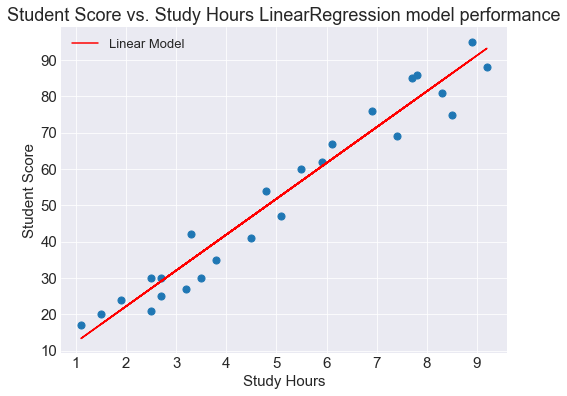

In [14]:
# The predicted score values 
line = intercept + (X.values*coefficient)

# Chart size
fig, ax = plt.subplots(figsize=(8, 6))

# plotting the fitted line from the model along with the scatter plot between the two variable
plt.plot(X.values, line, color="r", label="Linear Model")
plt.scatter(x=df["Hours"], y=df["Scores"], s=50)
plt.xlabel("Study Hours", fontsize=15)
plt.ylabel("Student Score", fontsize=15)
plt.title("Student Score vs. Study Hours LinearRegression model performance", fontsize=18)
ax.tick_params(axis='both', labelsize=15)
plt.legend(fontsize=13);

# 4. Predicting student score if student studied 9.25 hours/day

In [15]:
# predicting the score at 9.25 hours study/day
hours = pd.DataFrame({"Hours": [9.25]})
pred_score = model.predict(hours)
print("number of studied hours = {}".format(hours["Hours"].values[0]))
print("Predicted Score = {}".format(pred_score[0]))

number of studied hours = 9.25
Predicted Score = 93.73810019581069
